<a href="https://colab.research.google.com/github/soumya1984/30-Days-of-Python/blob/master/SL_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



## Loading the dataset

In [ ]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive//notebooks/Loan_Modelling.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# viewing the first 5 rows of the data
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# viewing the last 5 rows of the data
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
df.shape

(5000, 14)

In [ ]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- All the columns in the data are numeric.


In [ ]:
# checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# checking the number of unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

There are less unique values in Zip_Code column, that could indicate that there are around ~10% customer from the same

In [ ]:
# Let's look at the statistical summary of the data
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

ID:

* The ID variable serves as a unique identifier for each record, ranging from 1 to 5000.

**Age and Experience:**

* Customers in the dataset have an average age of 45.34, with a minimum age of 23 and a maximum age of 67.

* Experience ranges from -3 to 43, and the negative values may need further investigation.

**Income:**

* The average income is 73.77, with a wide distribution ranging from 8 to 224.
There is substantial variability in income levels among customers.

**ZIPCode:**

* ZIPCode is represented as numerical values, and the mean and quartiles indicate diversity among customers based on ZIPCode.

**Family:**

* The average family size is approximately 2.4, with values ranging from 1 to 4.
Most customers have a family size between 1 and 3.

**CCAvg:**

* Customers spend an average of 1.94 on credit cards, with a range from 0 to 10.
The distribution is right-skewed, indicating that most customers have lower credit card spending.

**Education:**

* Education is represented as a categorical variable with values 1 to 3.
The majority of customers have an education level of 1 or 2.

**Mortgage:**

* The average mortgage value is 56.50, with a wide range from 0 to 635.
A considerable number of customers have no mortgage, as indicated by the 25th and 50th percentiles being 0.

**Personal Loan:**

* Only around 9.6% of customers accepted a personal loan, as indicated by the mean.

**Securities Account, CD Account, Online, CreditCard:**

* These binary variables indicate the presence or absence of a securities account, CD account, online banking usage, and credit card usage, respectively.
The mean values suggest that a minority of customers have a securities account, CD account, and credit card.

In [ ]:
df.drop(columns=["ID"], inplace=True) # dropping the ID column

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

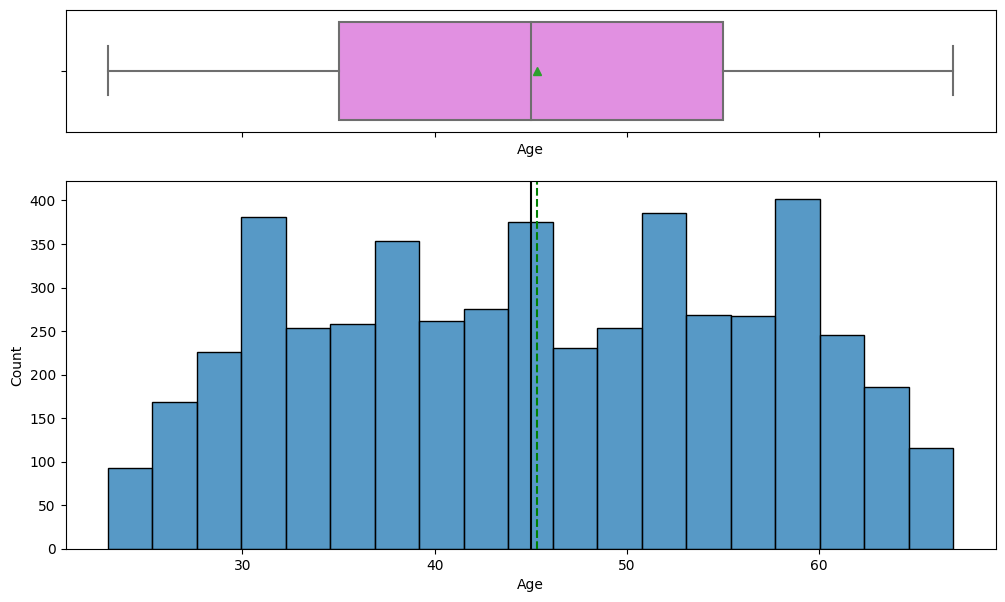

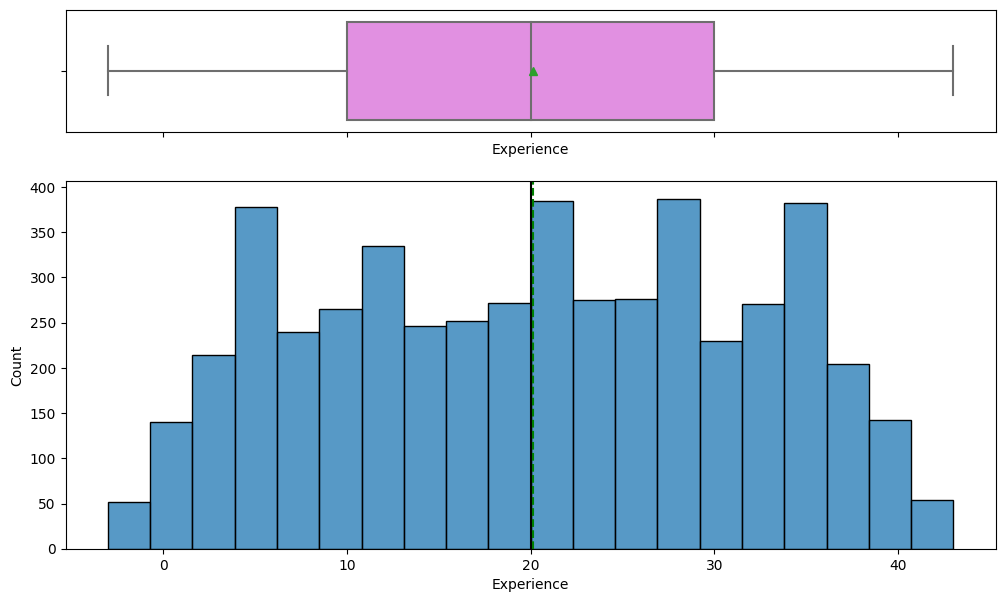

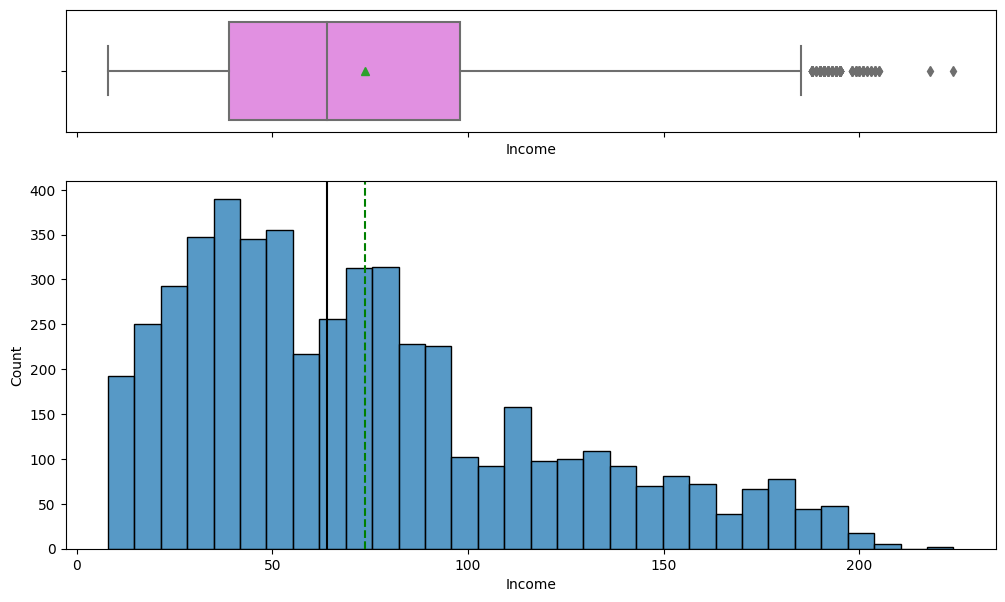

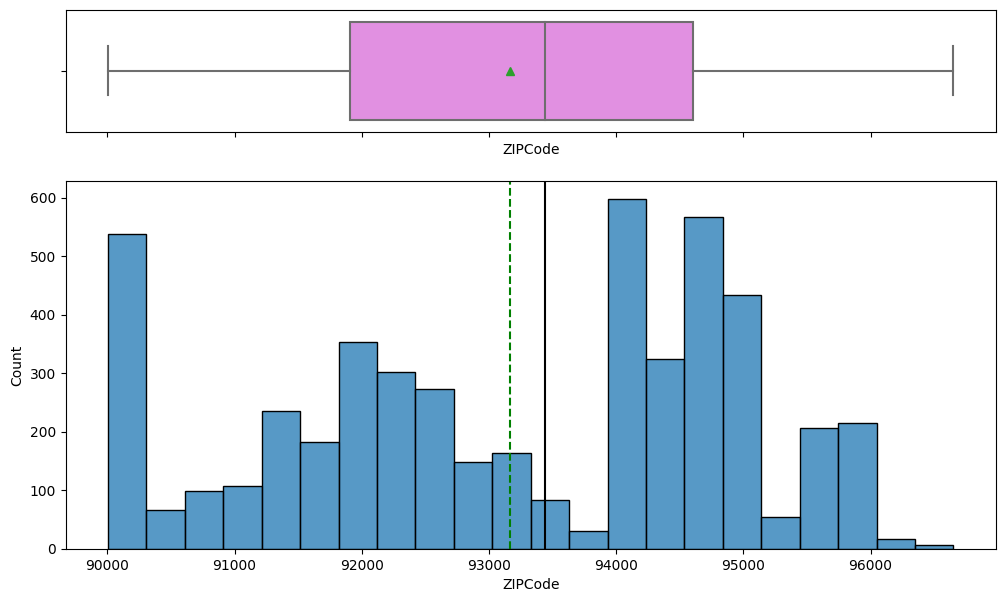

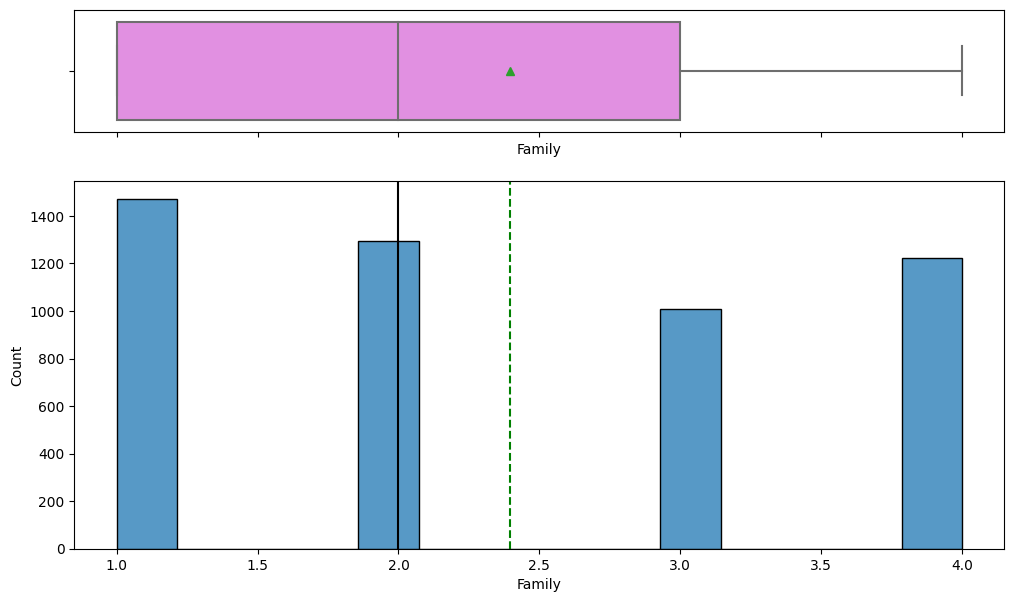

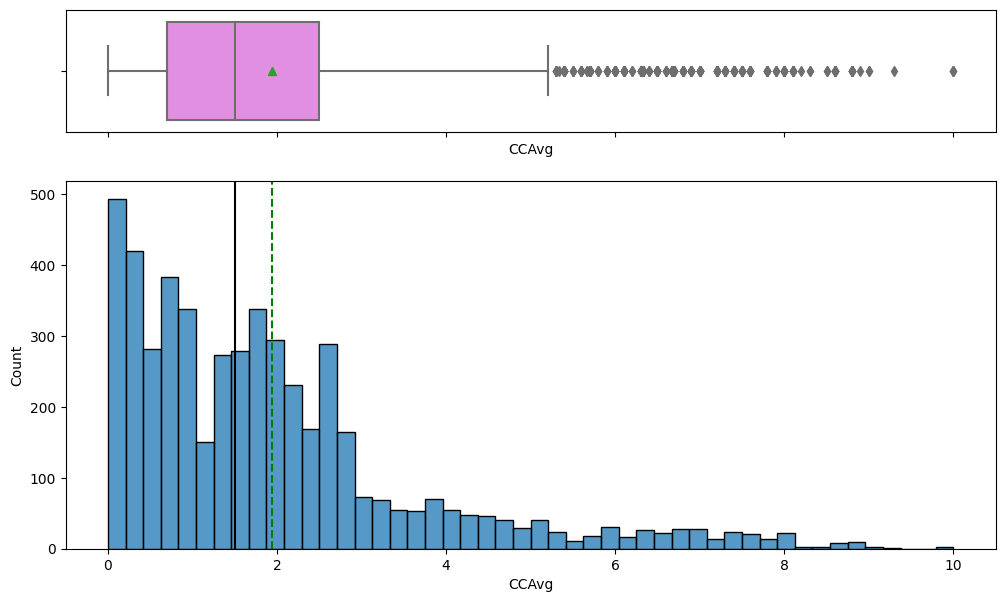

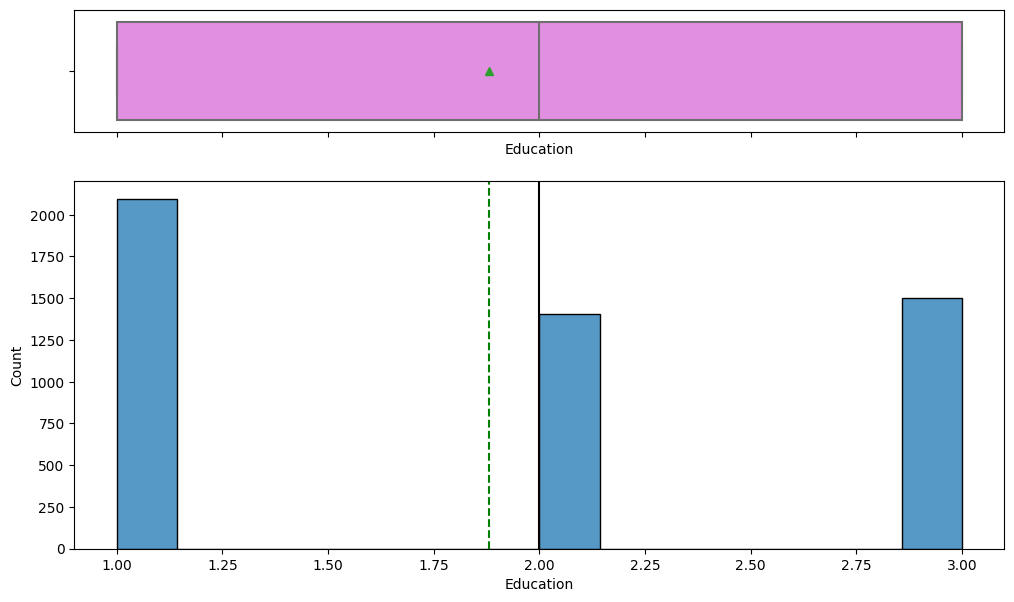

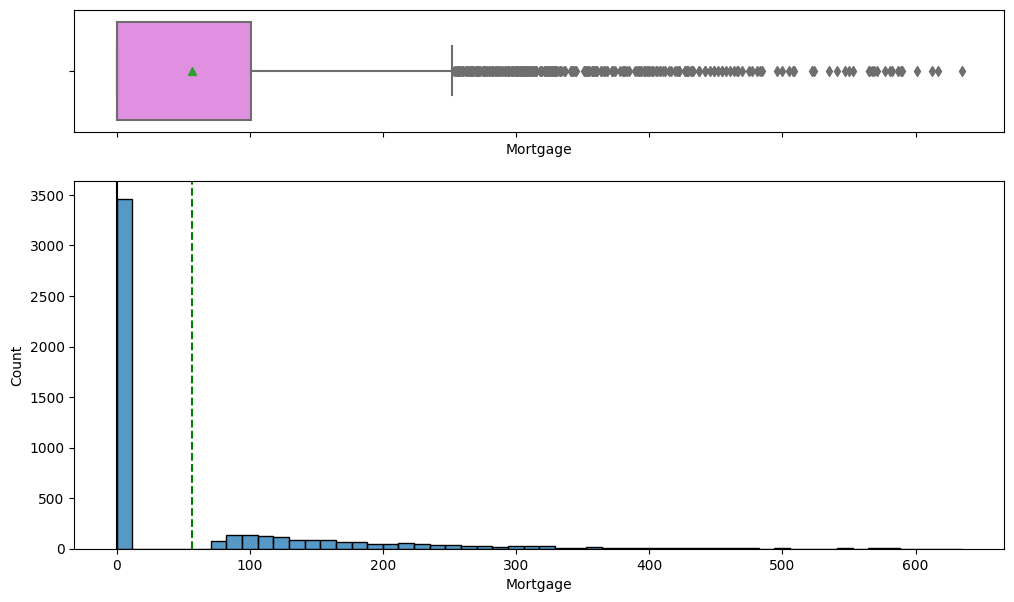

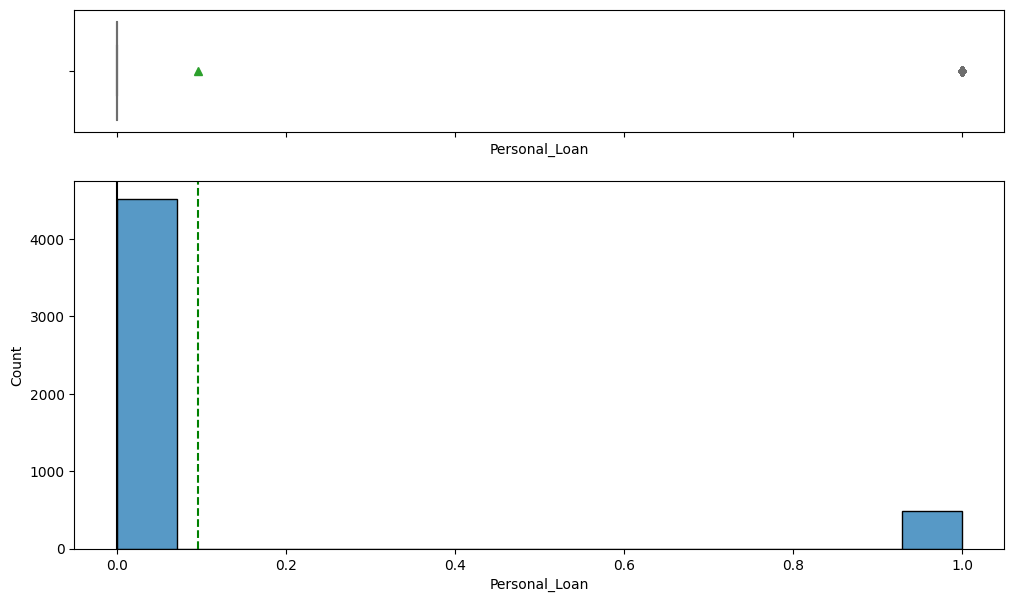

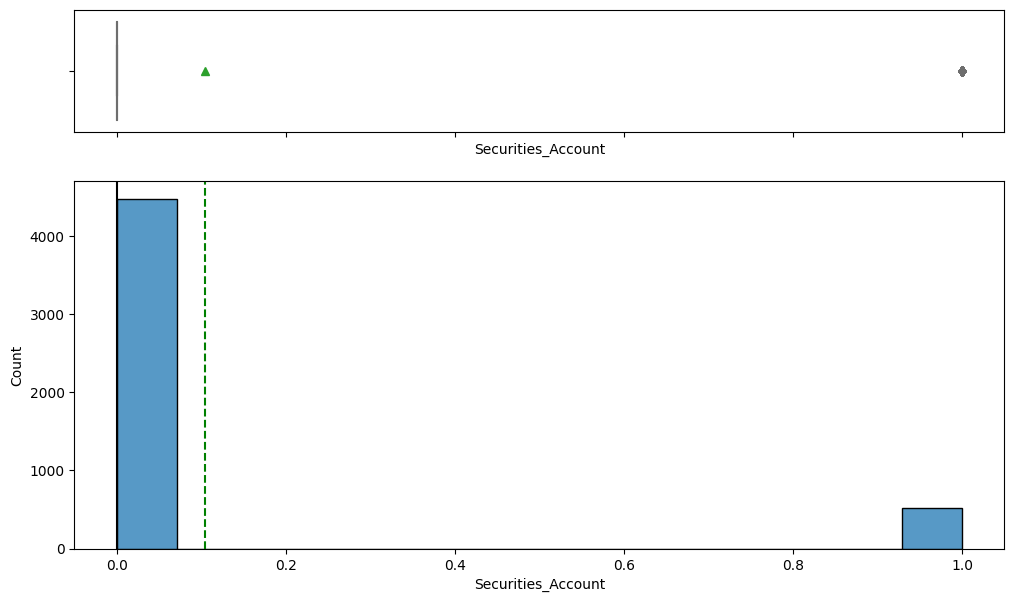

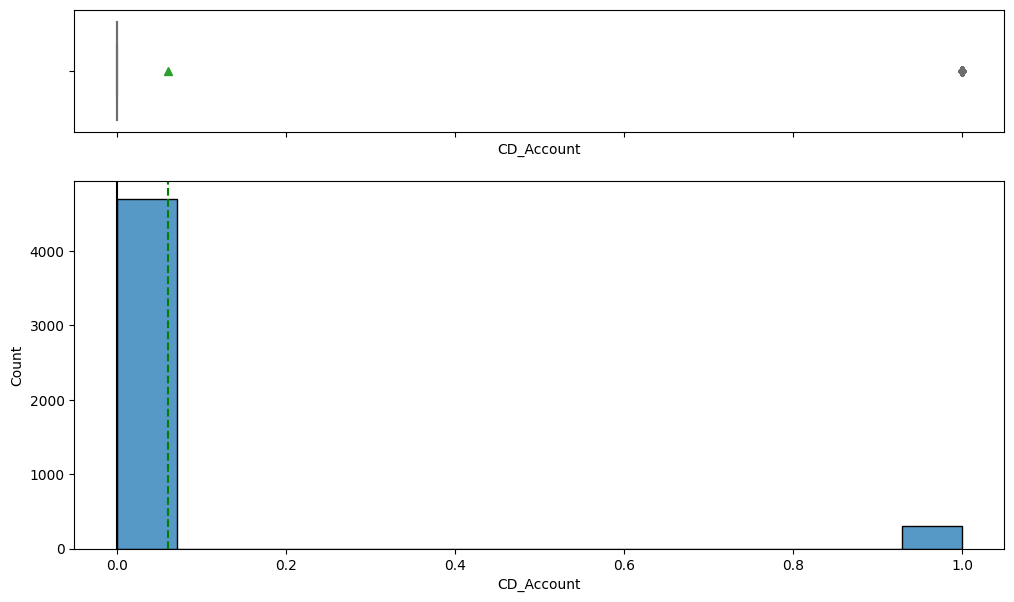

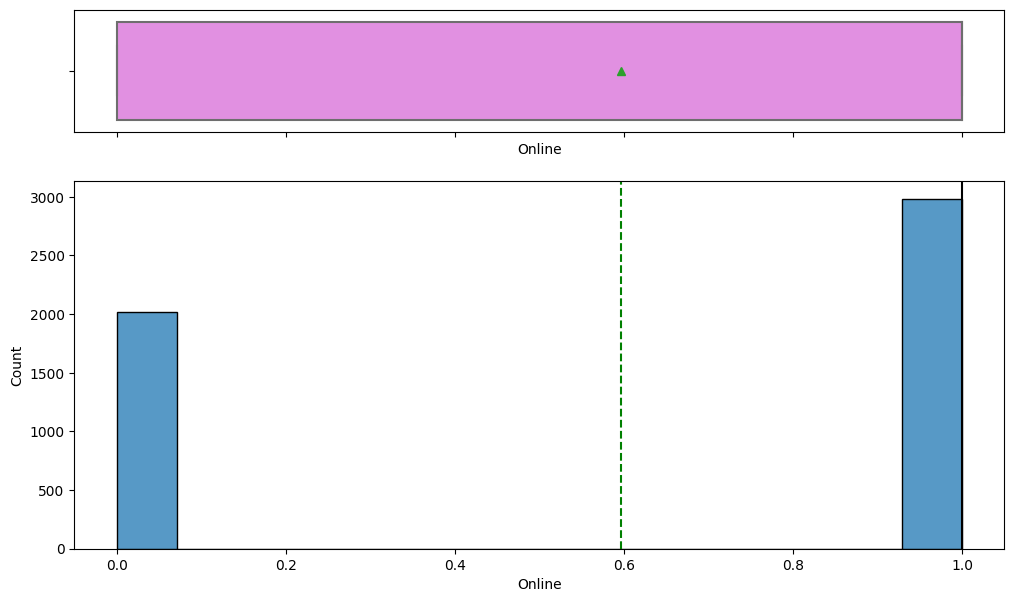

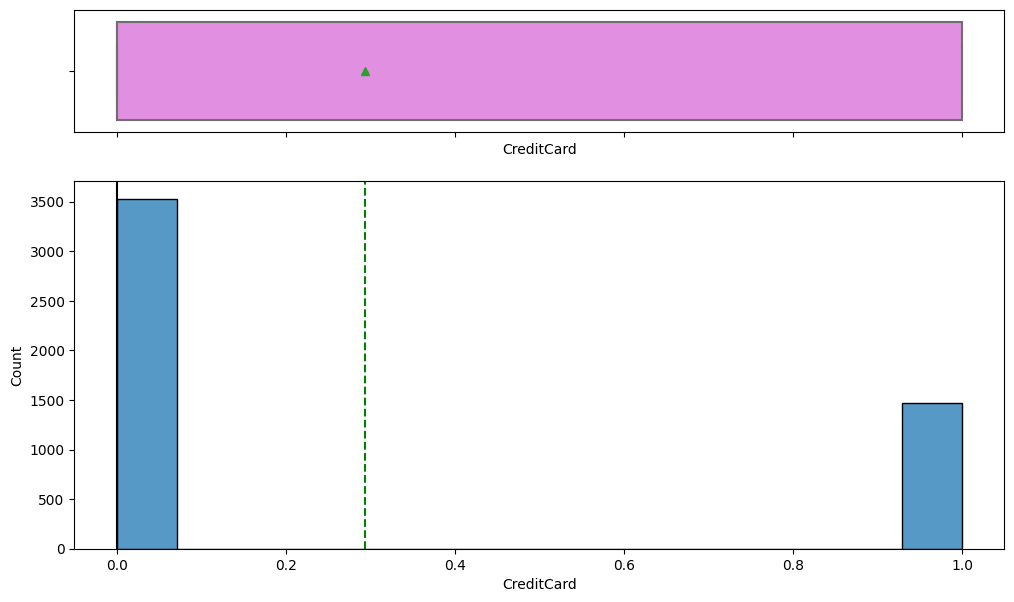

In [ ]:
for col in df.columns:
    histogram_boxplot(df, col)

**Observations**

- ~median age of the customer is 45.
- ~median exp of the customer is 20.
- ~income is having potential outliers, and skewed.
-  94000, 94000 zip codes are having highes no of customer.
-  majority of the customer is having ~1 family nember followed by 2,4.
-  avg credit card data is highly skewed and having outliers.
-  Majority of the customers are undergraduate.
-  Majority of customer naver took a mortgage.  
-  Majority of the customer does not having personal loan.
-  Majority of customers does not have security account.
-  Majority of cutomers does not have cd account
-  Majority of the customers are present online
-  Majority of the customer does not have credit cards.

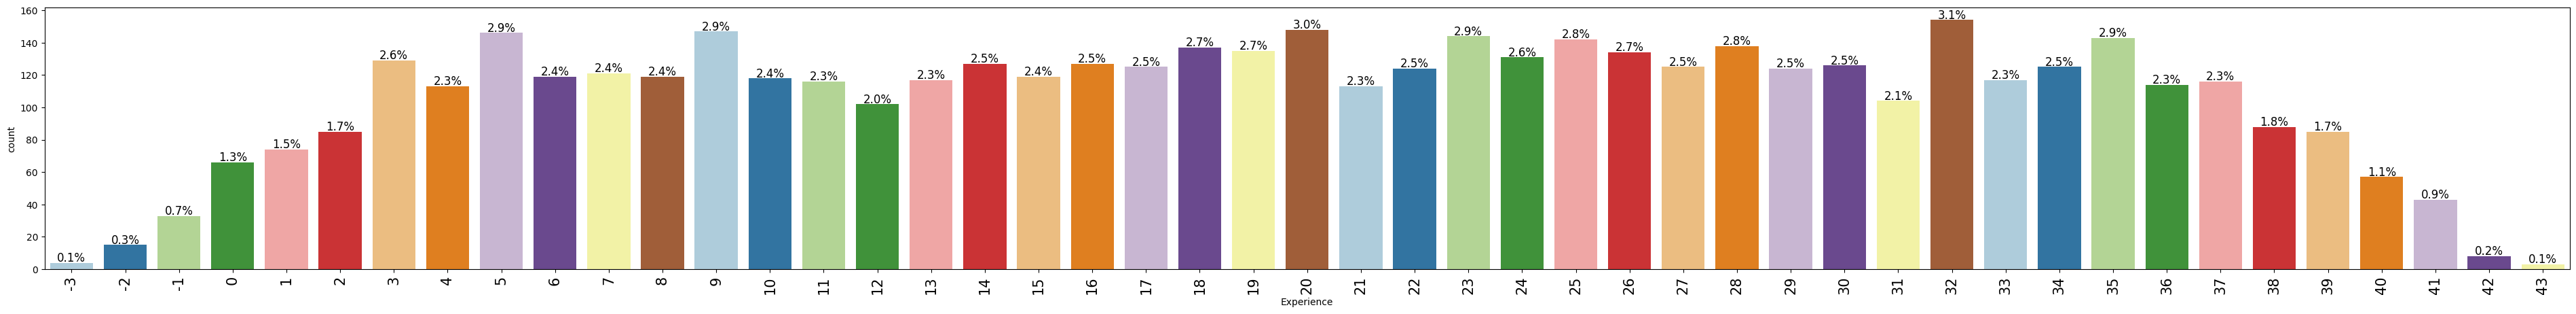

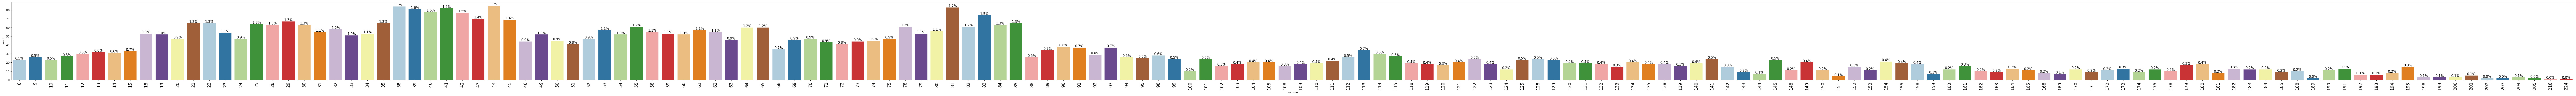

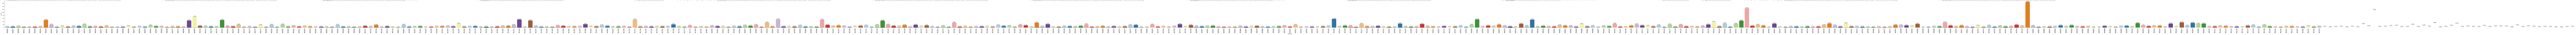

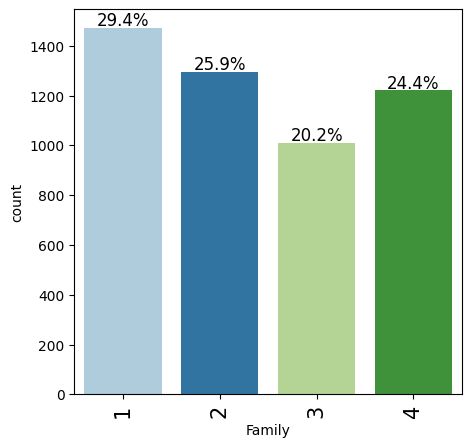

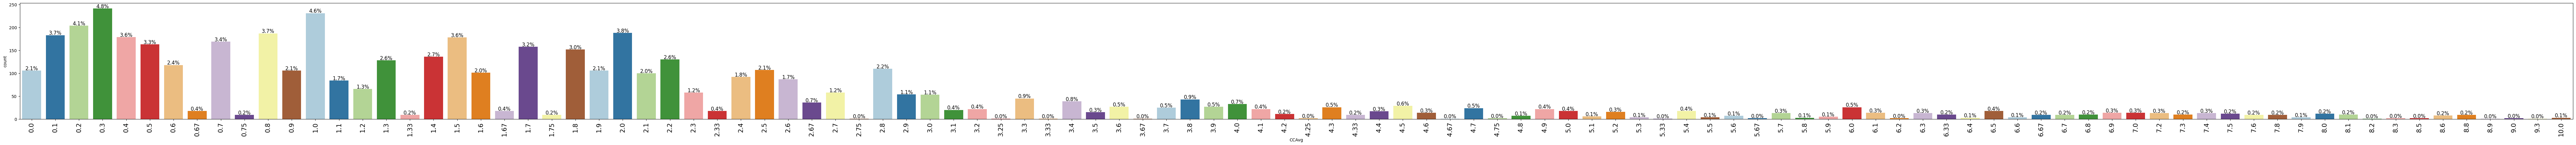

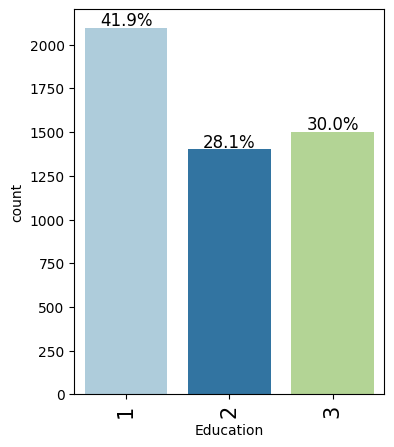

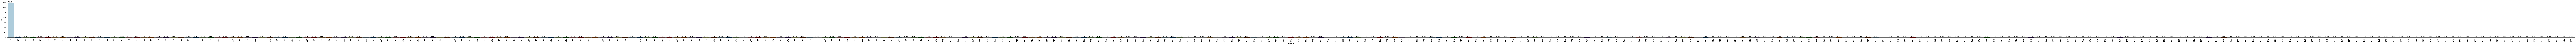

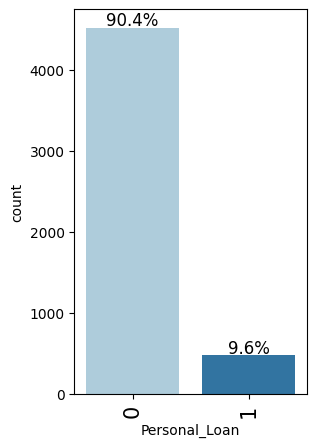

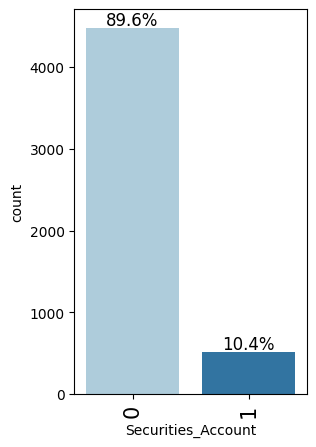

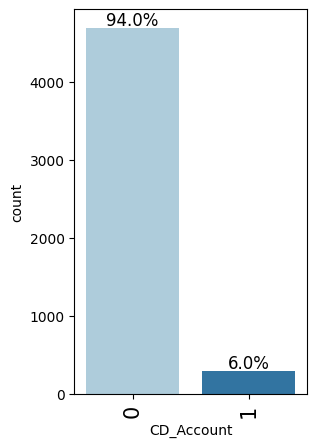

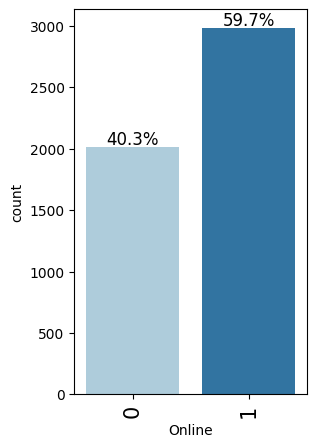

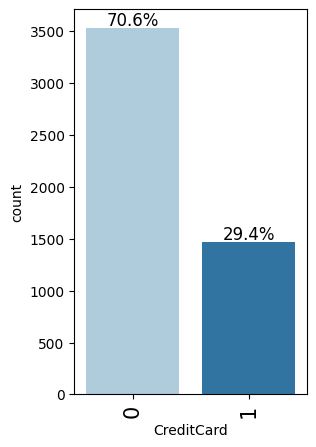

In [ ]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

**Bivariate** Analysis


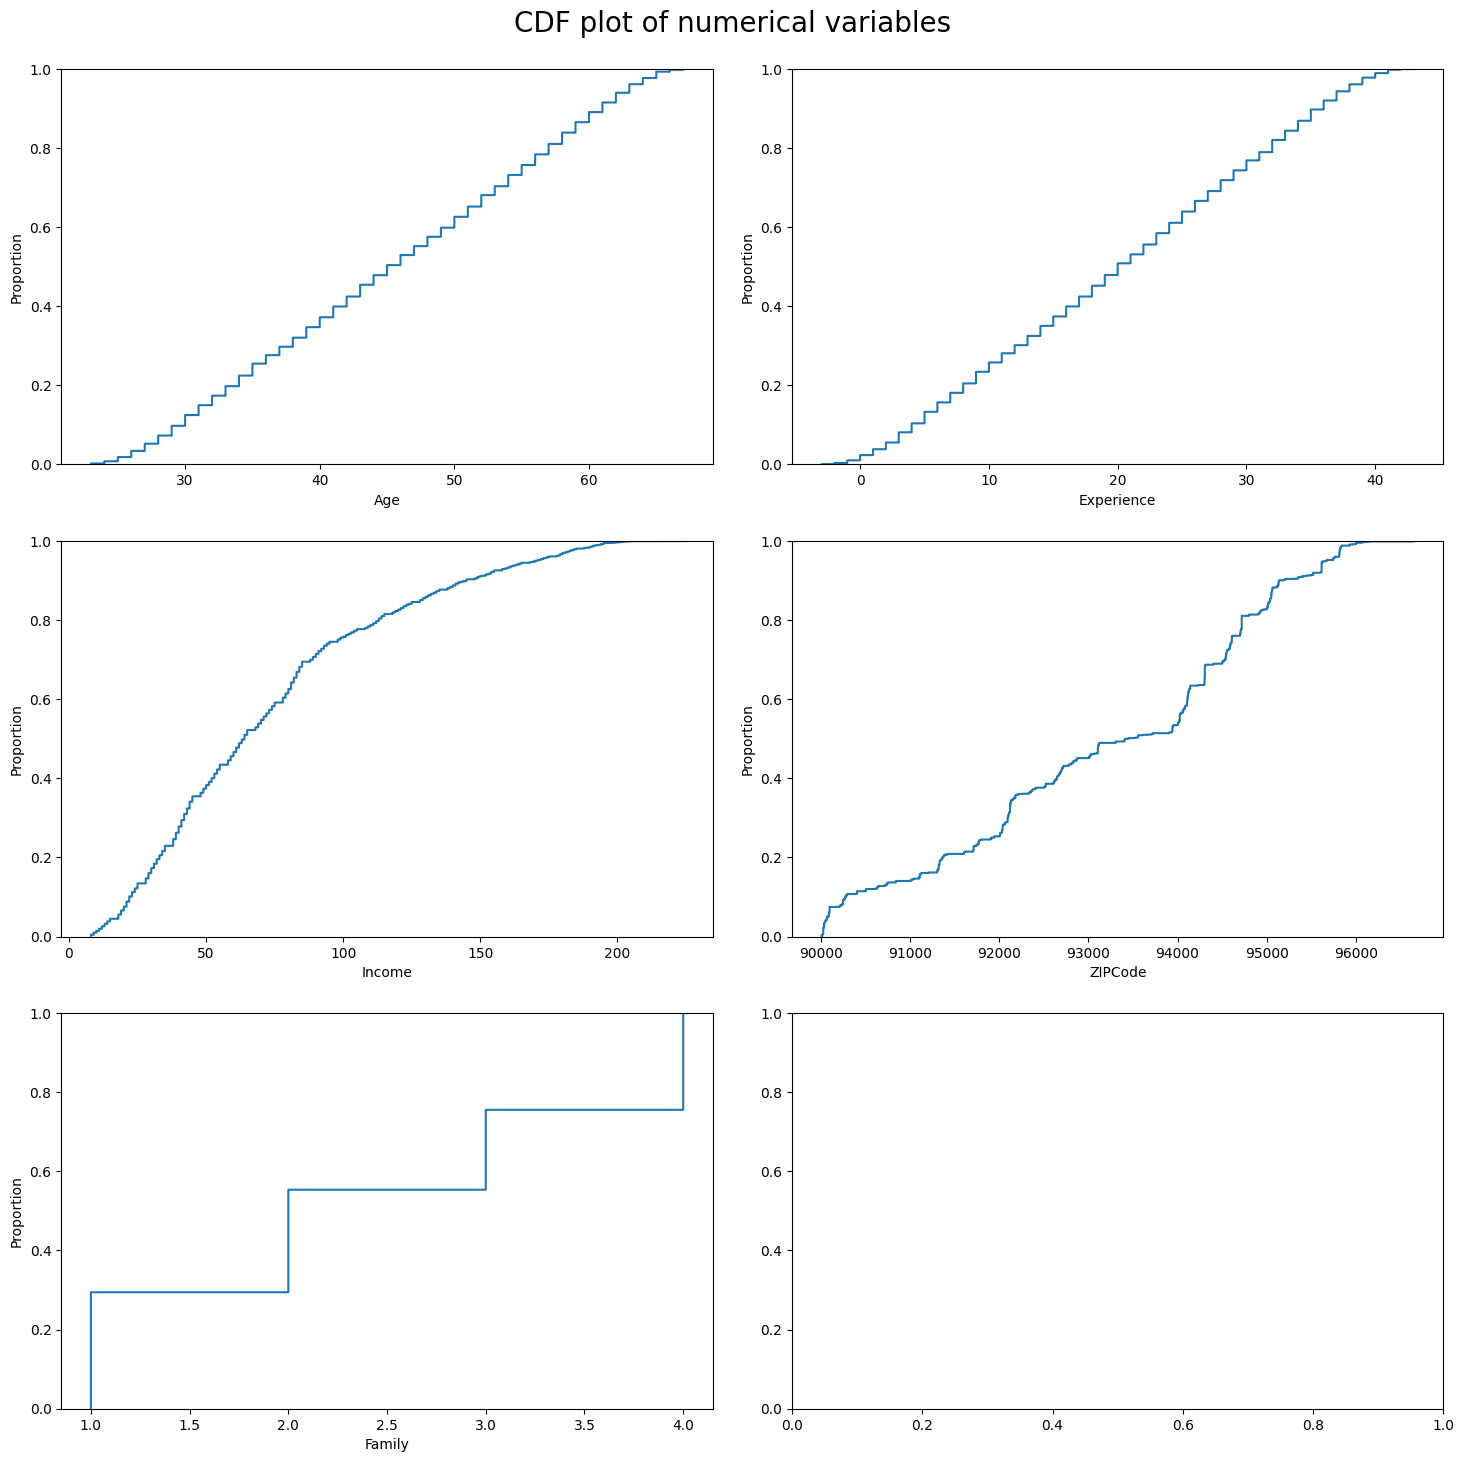

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Bivariate Analysis

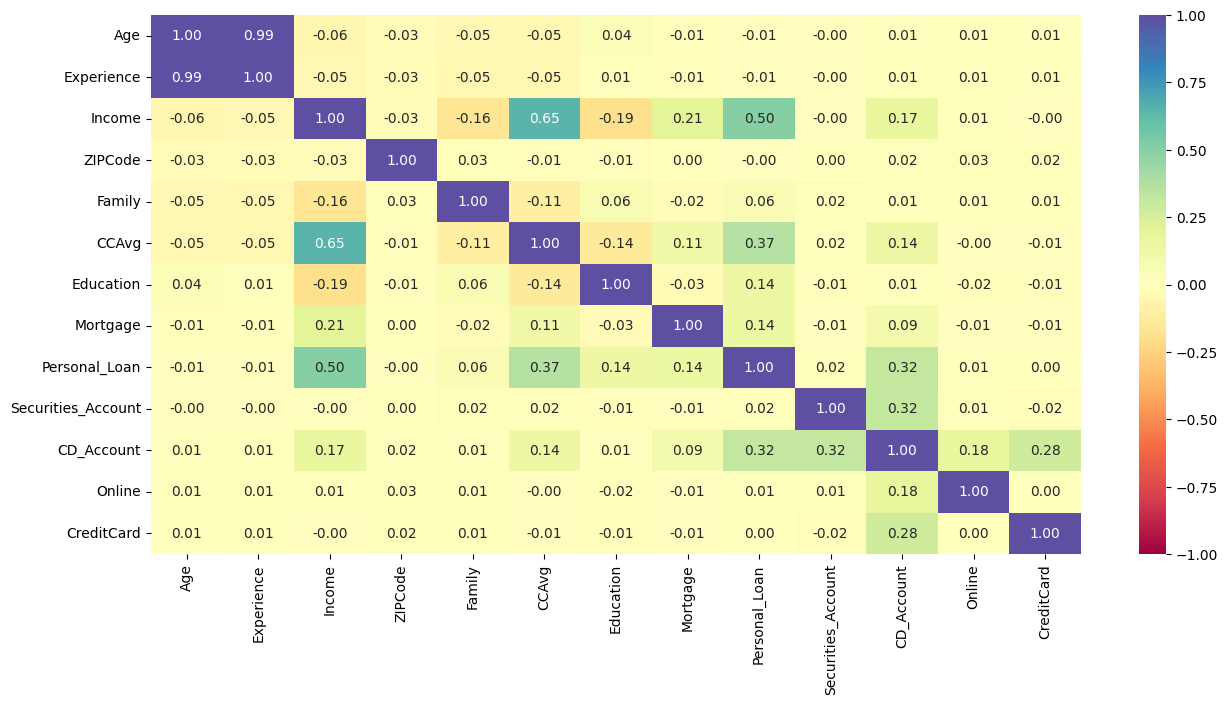

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**



*   Looking at corellation income ~ personal loan, income ~ credit card having strong corelation




In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


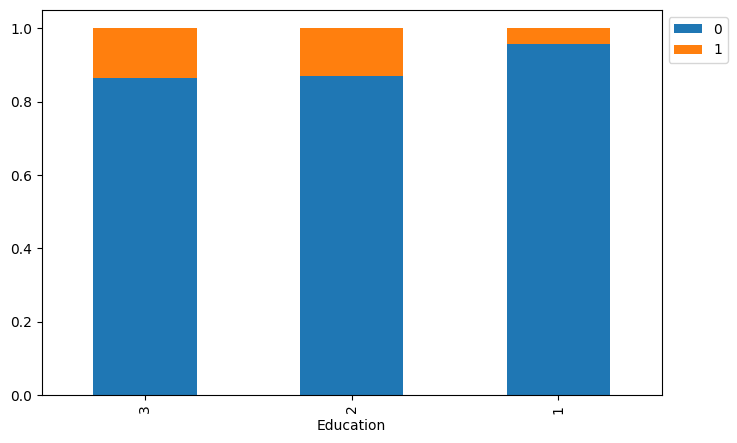

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")  ## Stacked barplot for Personal Loan and Education

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


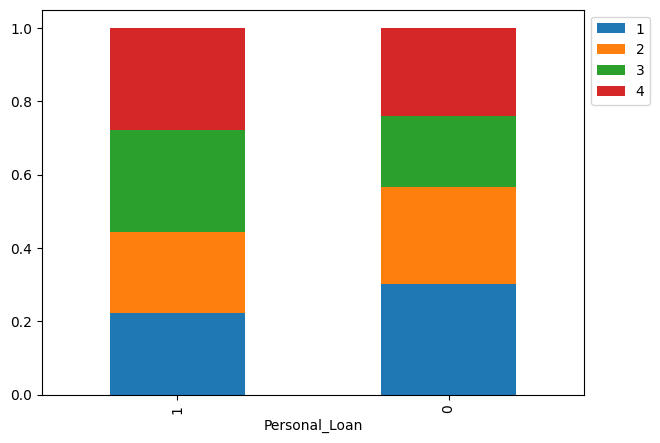

In [ ]:
stacked_barplot(data, "Personal_Loan", "Family")  ## Stacked barplot for Personal Loan and Family

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

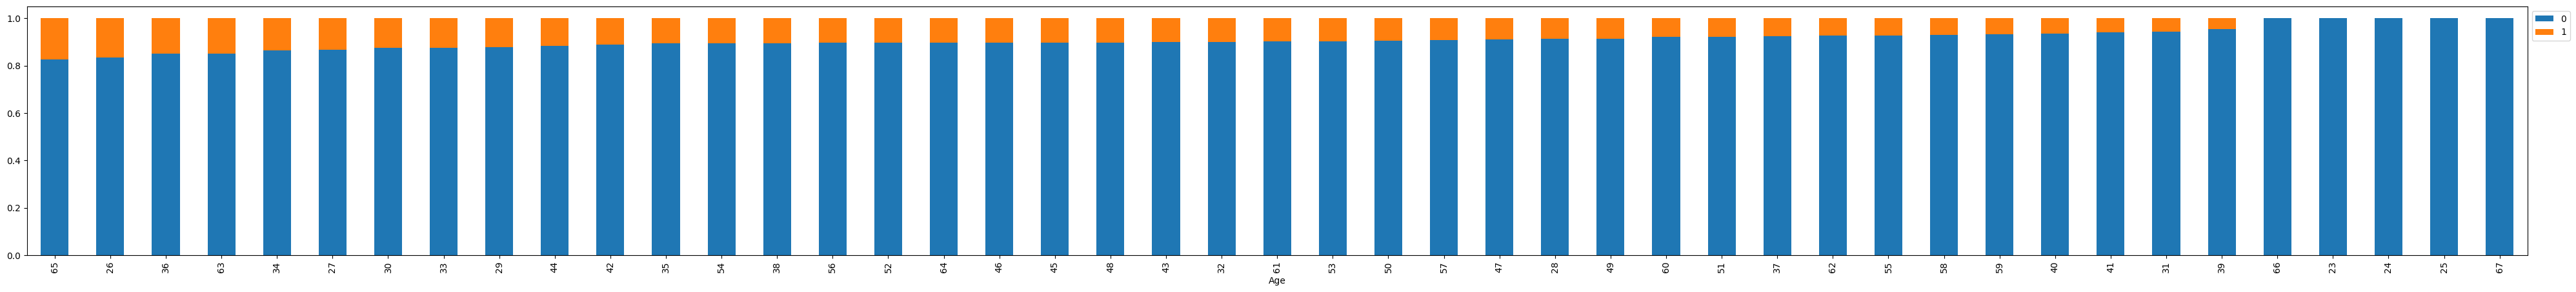

In [739]:
stacked_barplot(data, "Age", "Personal_Loan")  ## Stacked barplot for Personal Loan and Education

**Observations**

* ~What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
   - Majority of the customer does not have mortgage & there are outliers in the data

* ~How many customers have credit cards?
   - around 30% customers have credit cards
* ~What are the attributes that have a strong correlation with the target attribute (personal loan)?
  - Credit cards & Income
* ~How does a customer's interest in purchasing a loan vary with their age?
   - Loan is almost evenly distributed across age.
* ~How does a customer's interest in purchasing a loan vary with their education?
   -

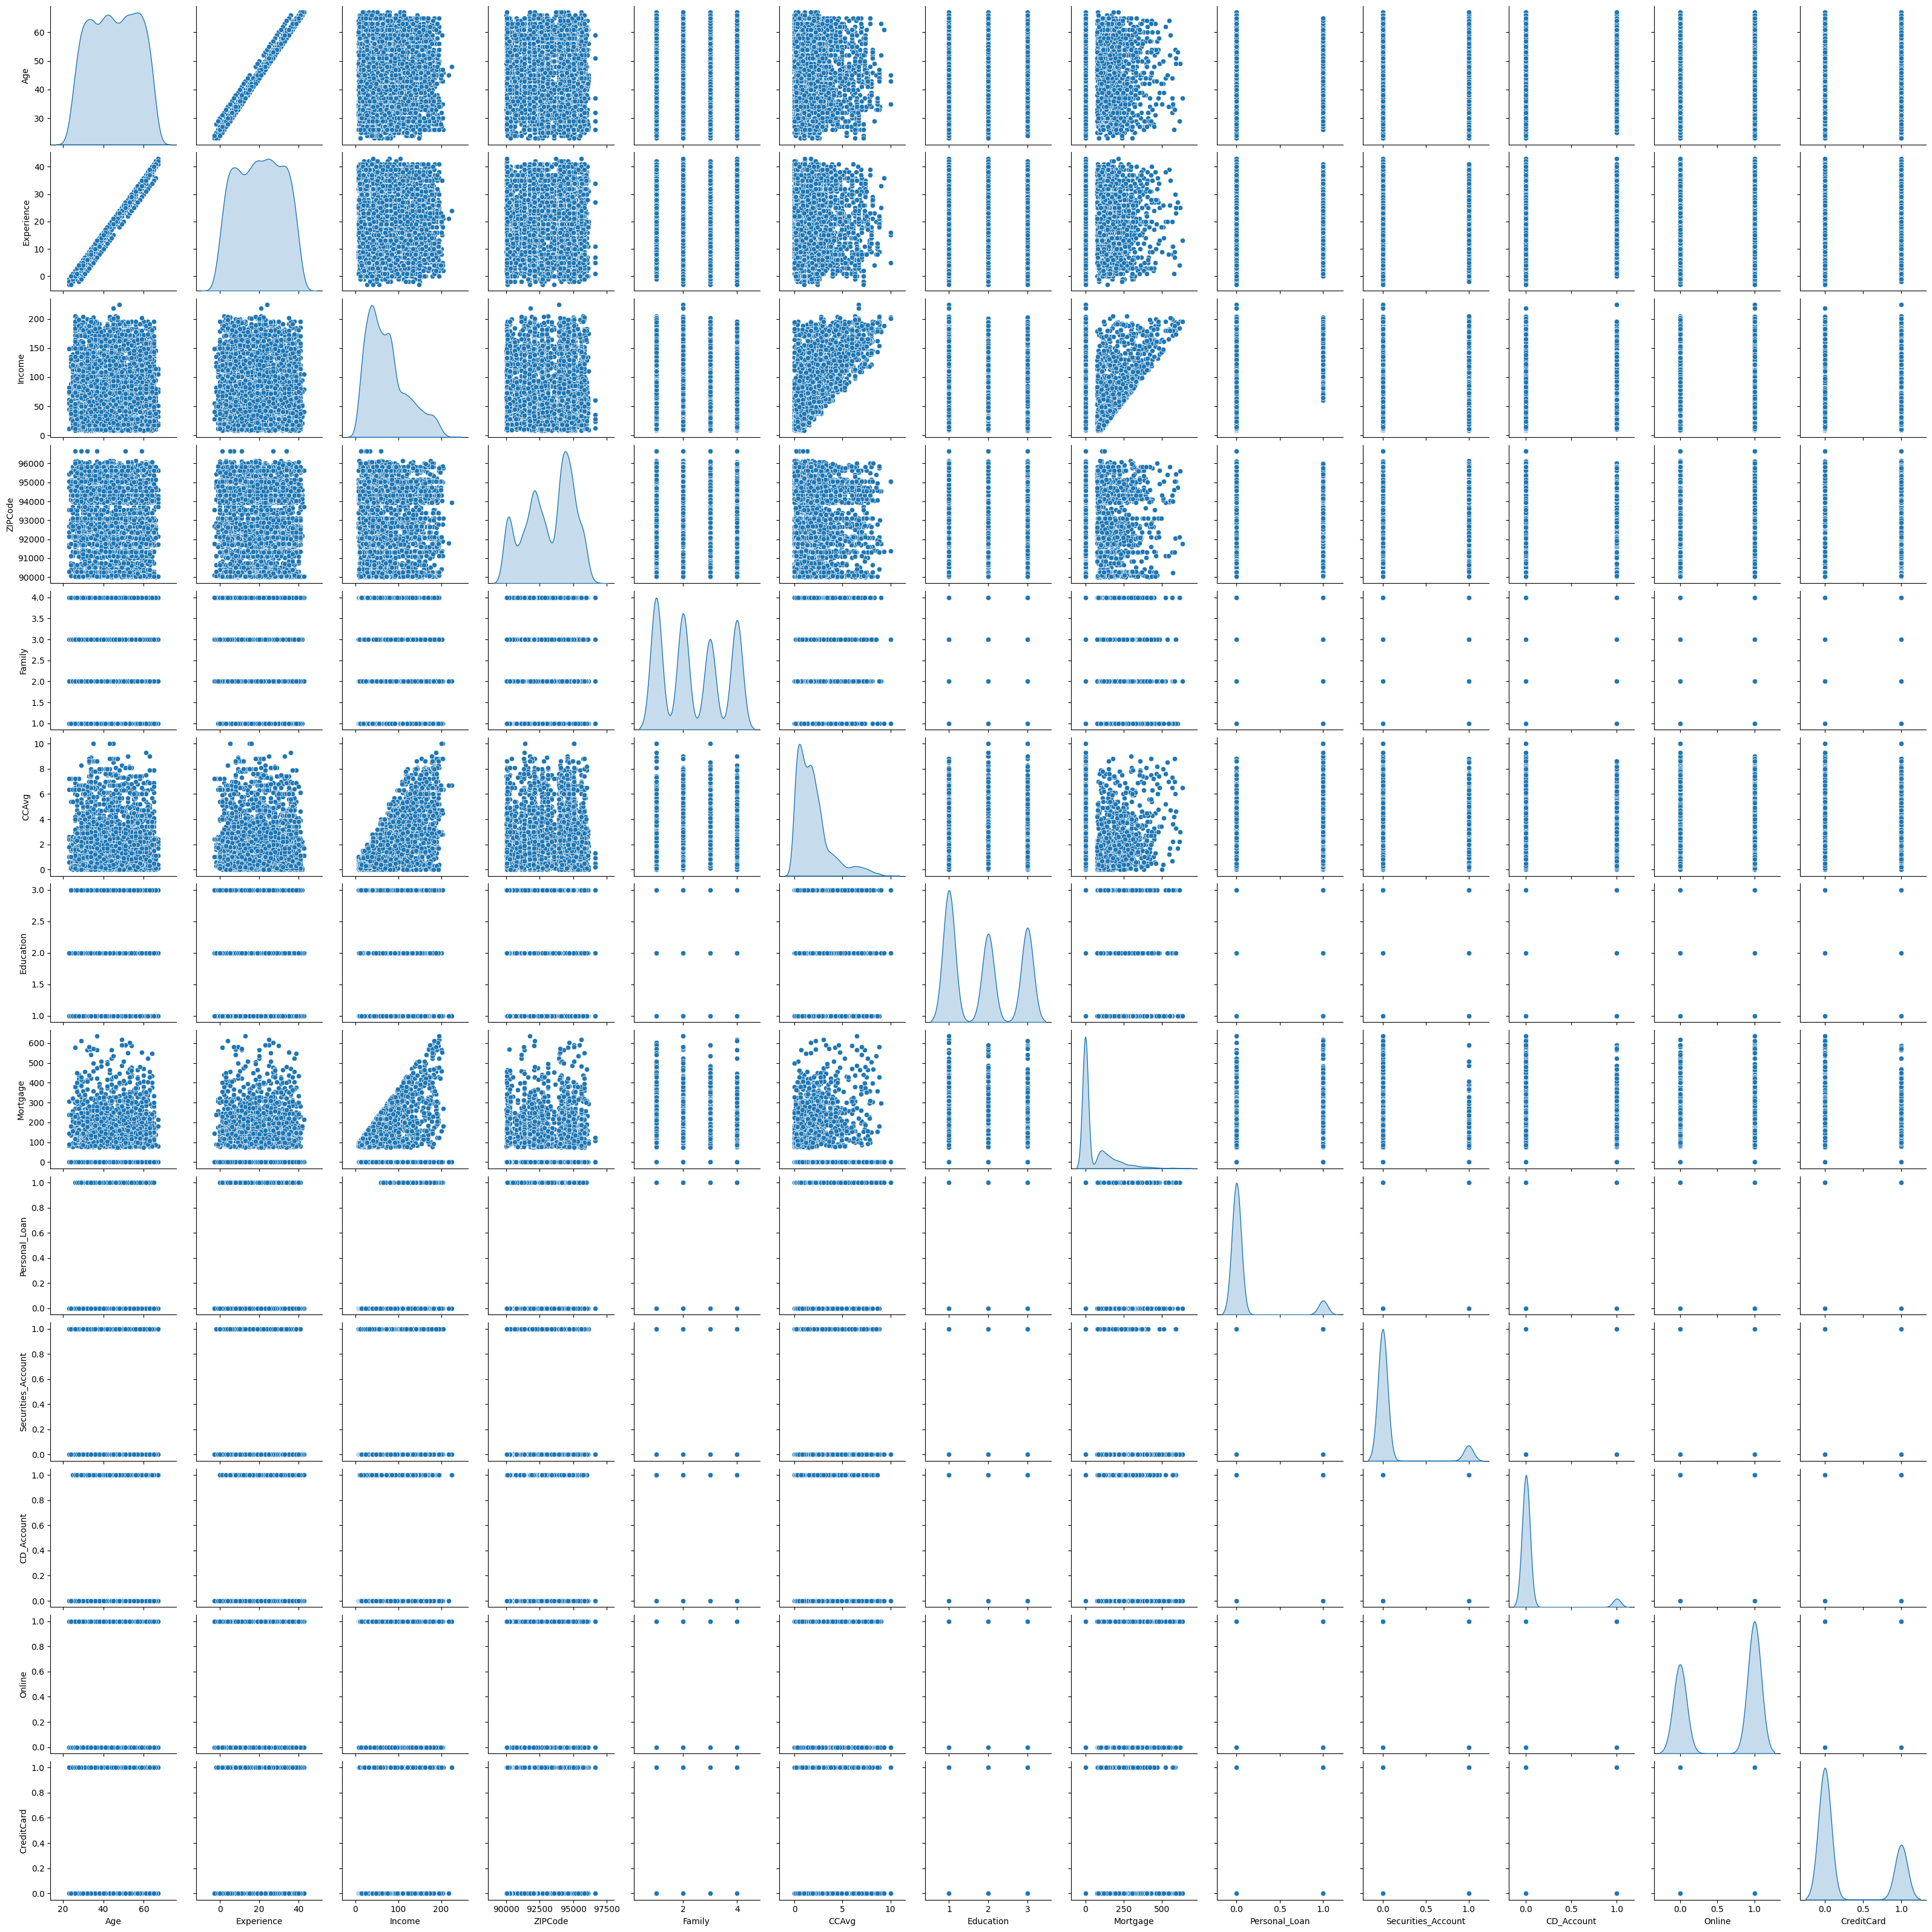

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**What is the distribution of mortgage attribute? **
 - ~Majority of the customer around ~3500 does not have any mortgage, for other coustomers mortgage range from 100-600

**Are there any noticeable patterns or outliers in the distribution?**
  - ~Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account has potential outliers

**How many customers have credit cards?**
  - ~1500 customers are having credit cards, which is around ~30%

**What are the attributes that have a strong correlation with the target attribute (personal loan)?**
  - ~ income --> ccavg, personal_loan is having strong relation compare to other attributes

**How does a customer's interest in purchasing a loan vary with their age?**
 - ~ its across all ages

**How does a customer's interest in purchasing a loan vary with their education?**
  - ~ Professonal's has taken highest no of loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
Q1 = data.quantile(0.25)  # Finding the 25th percentile
Q3 = data.quantile(0.75)  # Finding the 75th percentile

IQR = Q3 - Q1  # Interquartile Range (75th percentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bound for outliers
upper = Q3 + 1.5 * IQR  # Finding the upper bound for outliers


In [ ]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
ZIPCode                0.00
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

* ID: No outliers detected (0.00%).
* Age: No outliers detected (0.00%).
* Experience: No outliers detected (0.00%).
* Income: 1.92% of values in the "Income" column are potential outliers.
* ZIPCode: No outliers detected (0.00%).
* Family: No outliers detected (0.00%).
* CCAvg: 6.48% of values in the "CCAvg" column are potential outliers.
* Education: No outliers detected (0.00%).
* Mortgage: 5.82% of values in the "Mortgage" column are potential outliers.
* Personal_Loan: 9.60% of values in the "Personal_Loan" column are potential outliers.
* Securities_Account: 10.44% of values in the "Securities_Account" column are potential outliers.
* CD_Account: 6.04% of values in the "CD_Account" column are potential outliers.
* Online: No outliers detected (0.00%).
* CreditCard: No outliers detected (0.00%).

In [ ]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

In [ ]:
# checking if experience <0
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [ ]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

In [ ]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
# Separate independent and dependent variable
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]

In [ ]:
# Create dummy variables for ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Complete the code to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
print("Shape of Training set:", X_train.shape)  # Get the shape of the training set features
print("Shape of Test set:", X_test.shape)       # Get the shape of the test set features

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))     # Get the value counts of y_train data

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))      # Get the value counts of y_test data

Shape of Training set: (4000, 17)
Shape of Test set: (1000, 17)
Percentage of classes in training set:
0    0.905
1    0.095
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.9
1    0.1
Name: Personal_Loan, dtype: float64


## Model Evaluation Criterion

**In the realm of predictive modeling, incorrect predictions carry varying degrees of impact. Two critical scenarios involve:**

- Predicting a customer will take a personal loan, but in reality, the customer opts not to - Resulting in a loss of resources.
Predicting a customer will not take a personal loan, yet, in reality, the customer intended to - Leading to a loss of opportunity.
Which case is more important?

- The greater significance lies in scenario 2: losing a potential customer by predicting they won't take a personal loan when, in fact, they were inclined to do so.

**How to reduce this loss i.e., the need to minimize False Negatives?**

- To mitigate the impact of False Negatives, the bank should prioritize maximizing Recall. A higher Recall implies a lower likelihood of missing potential customers who would have taken a personal loan. Therefore, efforts should be concentrated on boosting Recall or minimizing False Negatives.

**Creating Reusable Functions**

**To streamline the evaluation process for various models, let's establish two functions:**

- model_performance_classification_sklearn: This function assesses the performance of a classification model and provides metrics such as Accuracy, Recall, Precision, and F1-score.

- confusion_matrix_sklearn: This function generates a confusion matrix with percentages, aiding in visualizing the model's performance.

**These functions will help avoid redundant code and enhance efficiency across different models.**

- Note: The subsequent code snippets would contain the implementation of these functions and the overall model-building process.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)

# Fit the Decision Tree on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

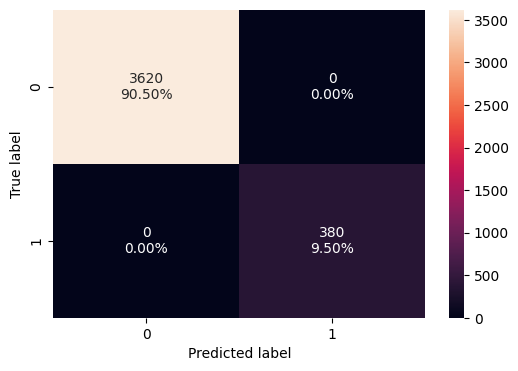

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Visualizing the Decision Tree**


In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


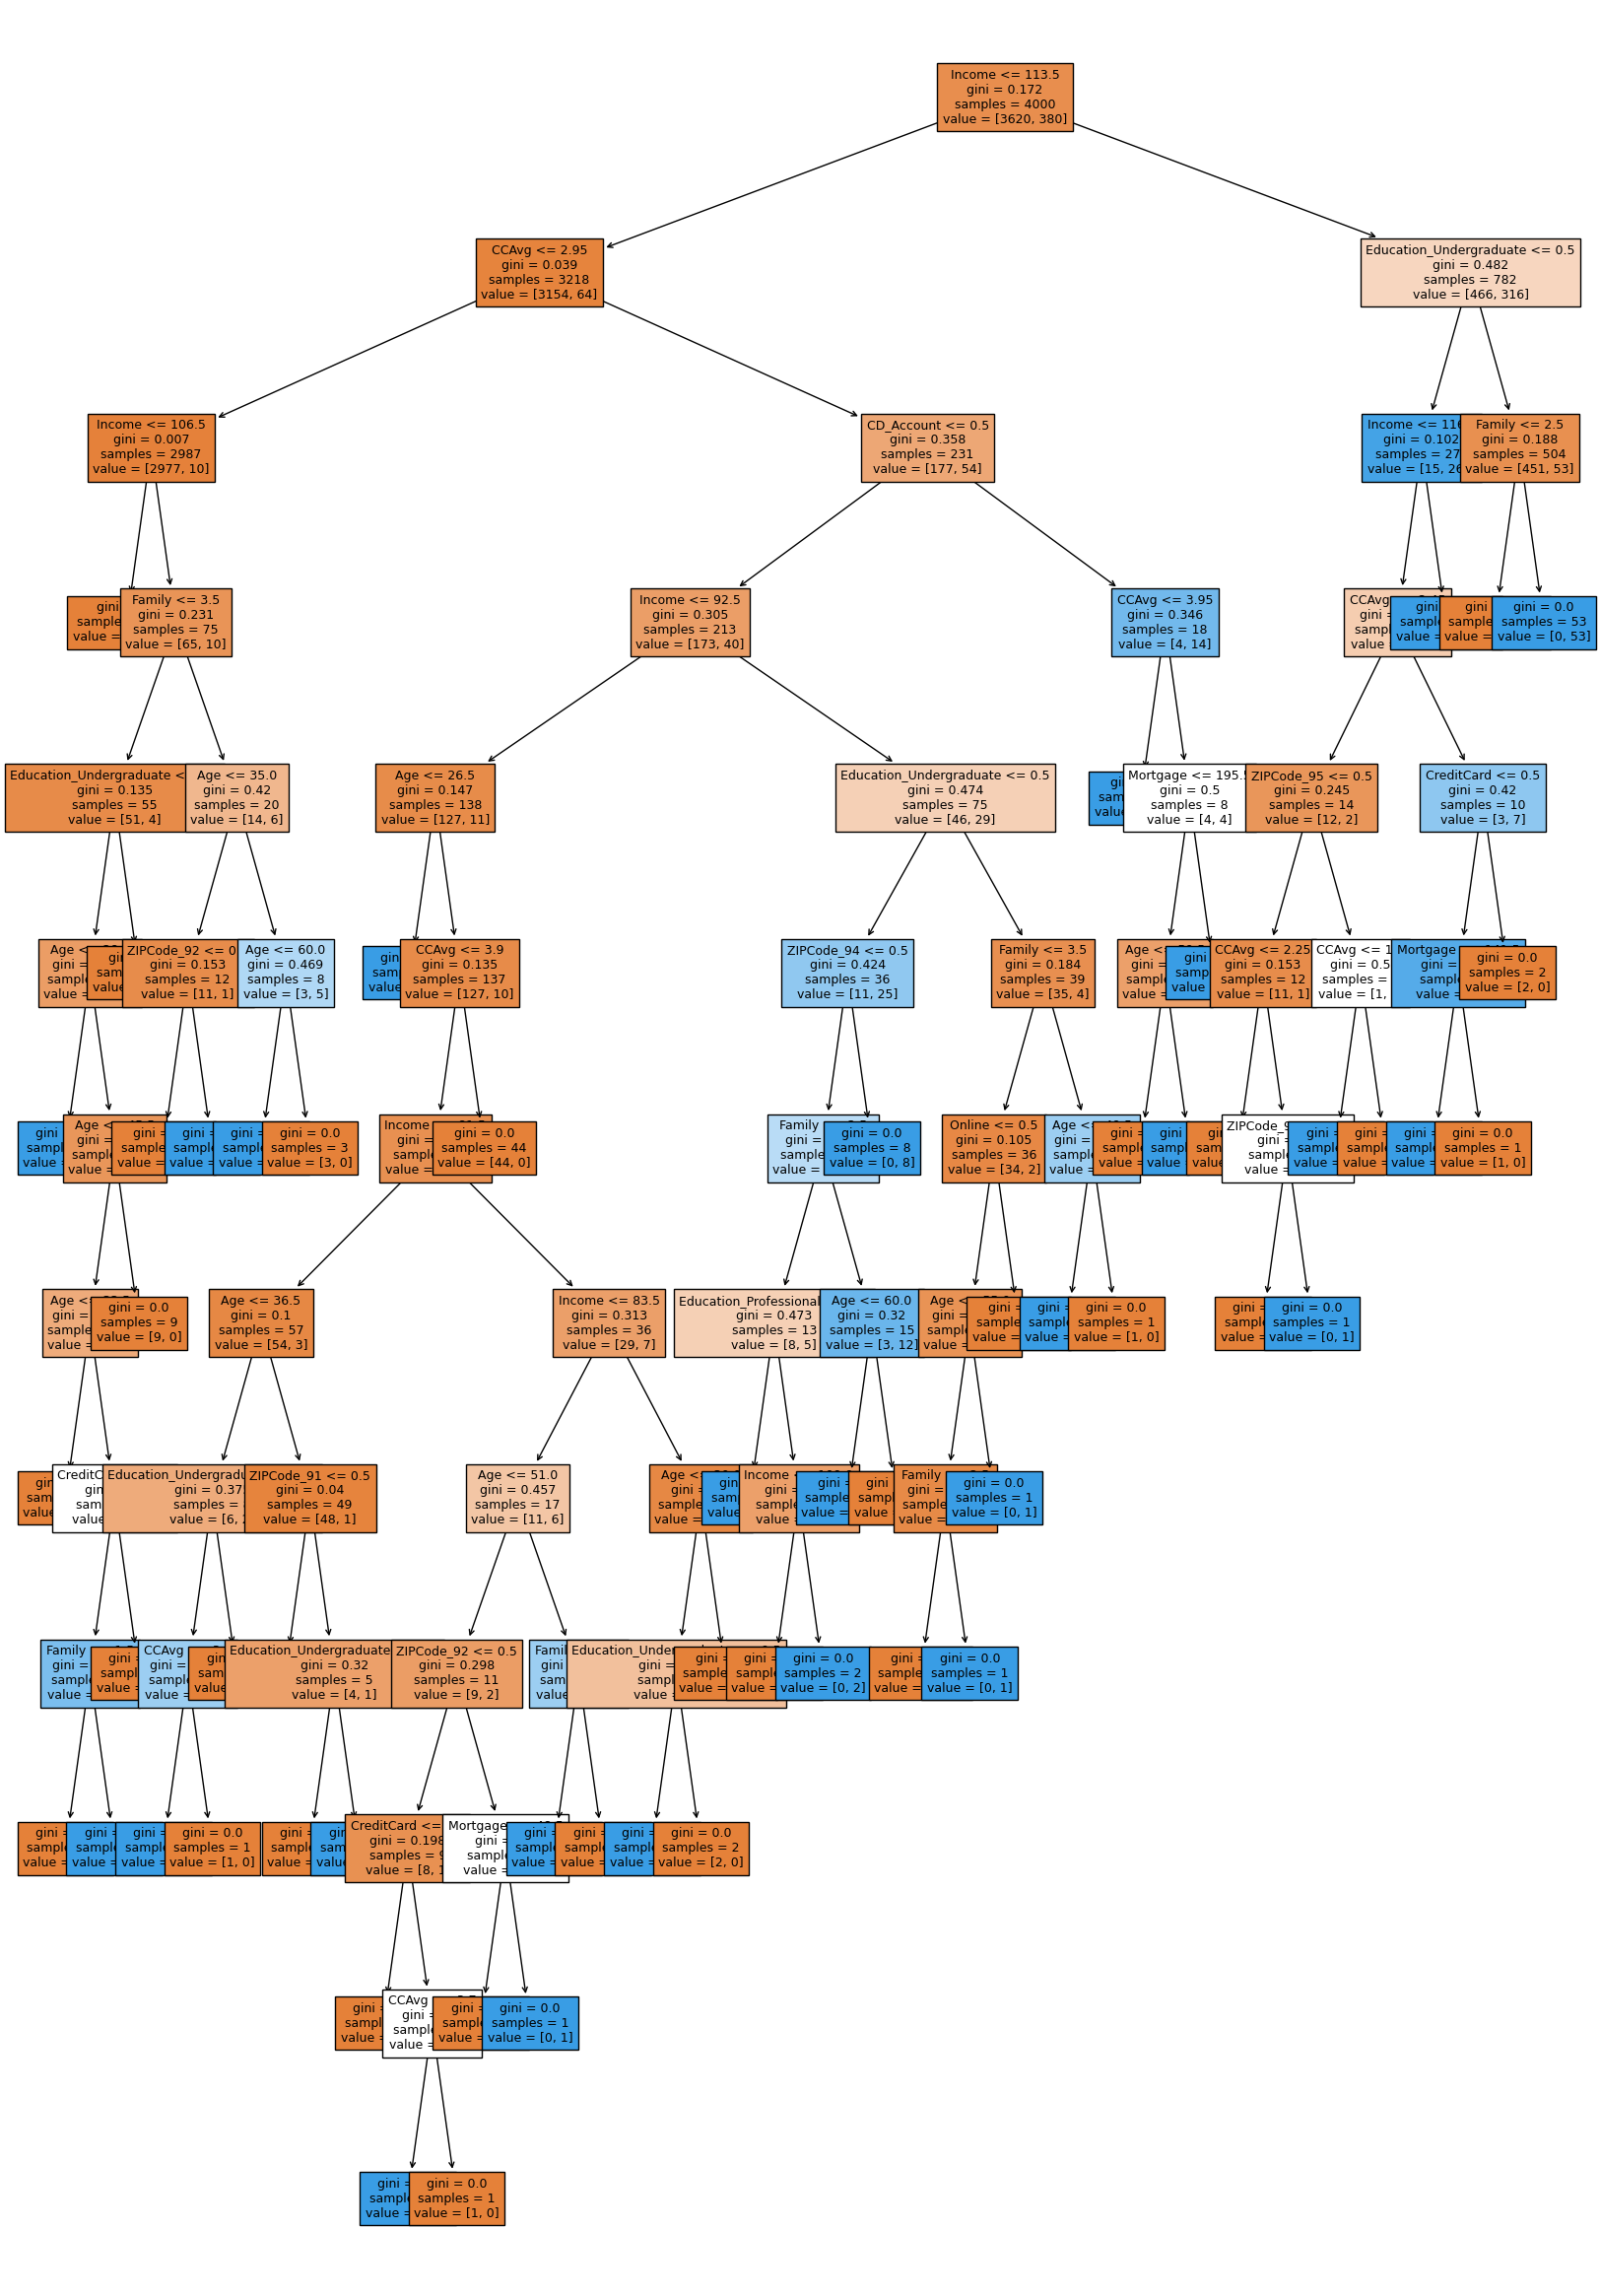

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2912.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |   |--- weig

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.395417
Income                   0.320334
Family                   0.155384
CCAvg                    0.048661
Age                      0.035325
CD_Account               0.016799
Mortgage                 0.007488
CreditCard               0.006874
ZIPCode_92               0.004839
Education_Professional   0.004295
ZIPCode_94               0.002792
ZIPCode_95               0.000865
ZIPCode_91               0.000522
Online                   0.000404
Securities_Account       0.000000
ZIPCode_93               0.000000
ZIPCode_96               0.000000


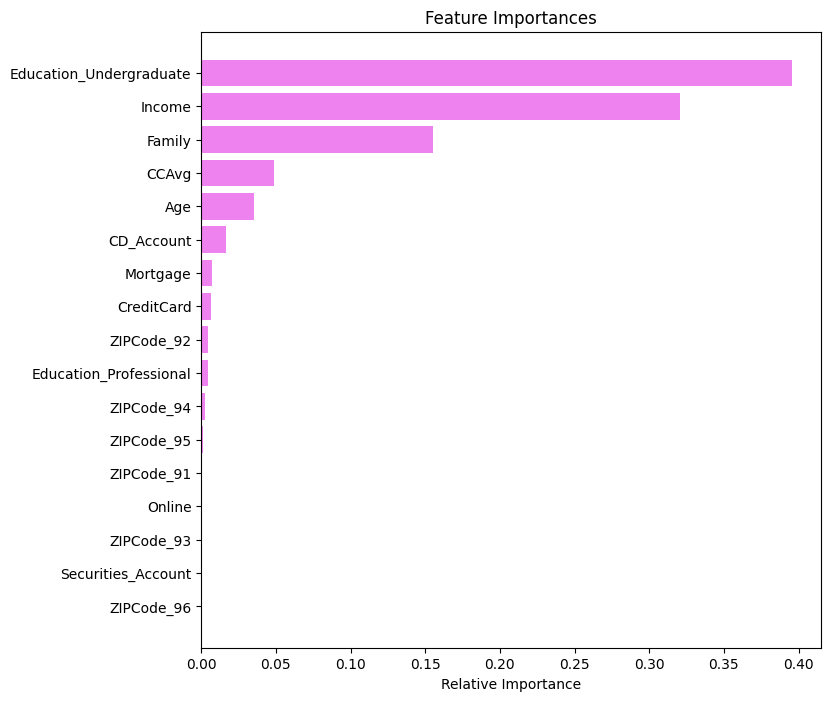

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

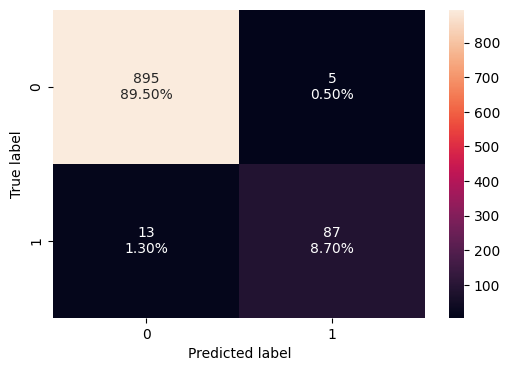

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)   # confusion matrix for test data

In [ ]:
# Model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision       F1
0     0.982    0.87   0.945652  0.90625

### Model Performance Improvement


**In summary, this code optimizes the hyperparameters of a decision tree classifier based on recall, which is a suitable metric for imbalanced classification problems. The resulting estimator is a decision tree model with the best hyperparameter**

##Pre Pruning

DecisionTreeClassifier:

- The code begins by initializing a decision tree classifier (estimator) with a random state to ensure reproducibility.
Grid Search with Cross-Validation:

- The GridSearchCV is employed to perform an exhaustive search over a specified parameter grid. This grid includes parameters related to the decision tree's structure, such as max_depth, min_samples_leaf, and max_leaf_nodes. Grid search systematically evaluates different combinations of these parameters to find the optimal configuration.
Scoring Metric:

- The choice of the scoring metric is crucial. In this case, the scoring metric used is Recall (acc_scorer = make_scorer(recall_score)). Recall is chosen as the scoring metric because the focus is on minimizing False Negatives (missing potential customers who would take a personal loan). Maximizing Recall helps achieve this goal.
Fitting the Model:

- The best combination of parameters is determined by the grid search (grid_obj.best_estimator_). The decision tree classifier (estimator) is then updated with these optimal parameters and fitted to the training data (X_train, y_train).
By performing grid search with cross-validation and selecting the model with the best recall, this pre-pruning approach helps find the optimal hyperparameters for the decision tree, ensuring that it doesn't become overly complex. This, in turn, improves the model's ability to generalize well to new, unseen data and minimizes the risk of overfitting.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=7,
                       random_state=1)

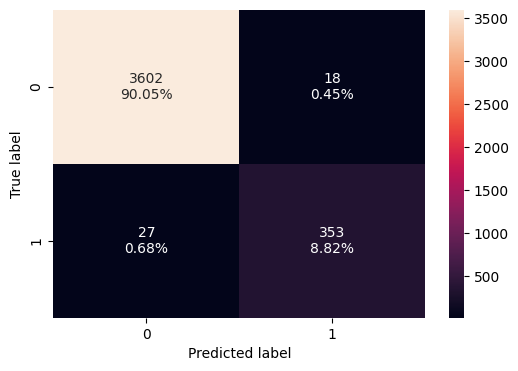

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train) ##create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## performance on train data
decision_tree_tune_perf_train

Accuracy    Recall  Precision       F1
0   0.98875  0.928947   0.951482  0.94008

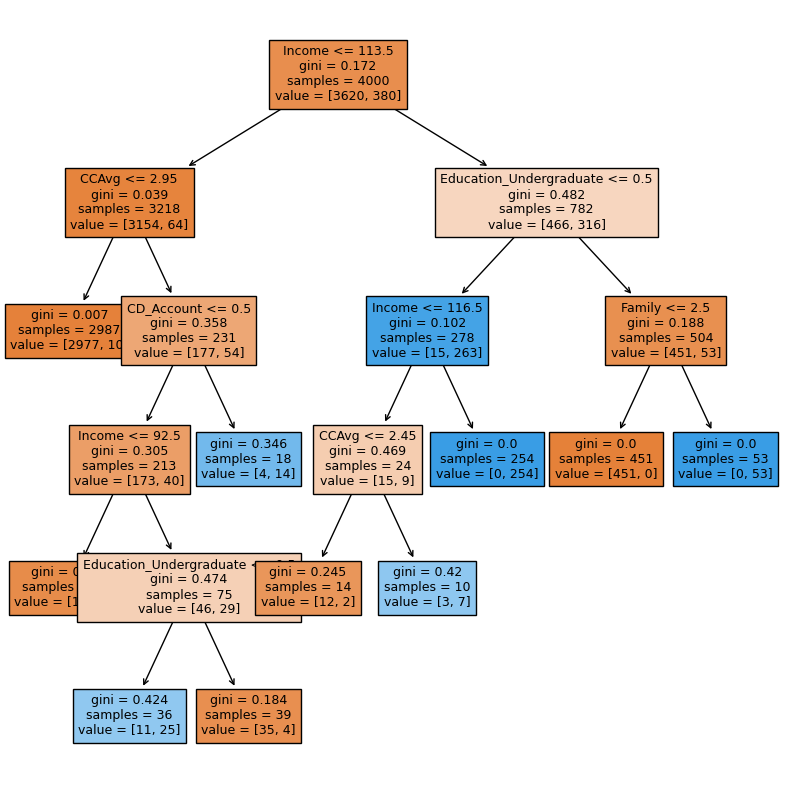

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2977.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 11.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- weights: [11.00, 25.00] class: 1
|   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |--- weights: [35.00, 4.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [4.00, 14.00] class: 1
|--- Income >  113.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [12.00, 2.00] class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [3.00, 7.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 254.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- wei

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.435940
Income                   0.346827
Family                   0.155163
CCAvg                    0.043169
CD_Account               0.018901
ZIPCode_93               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
Age                      0.000000
ZIPCode_92               0.000000
ZIPCode_91               0.000000
Online                   0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CreditCard               0.000000


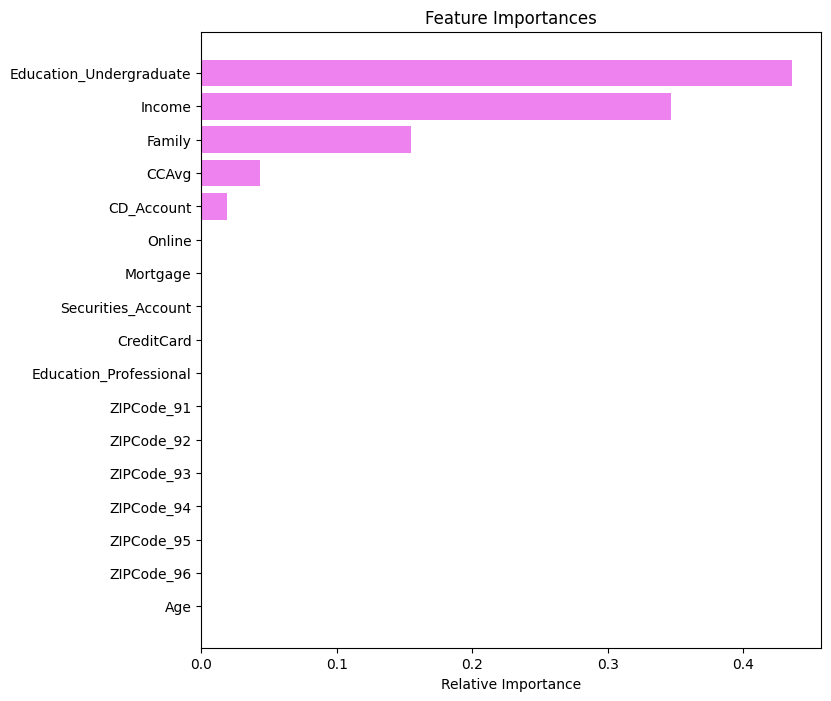

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

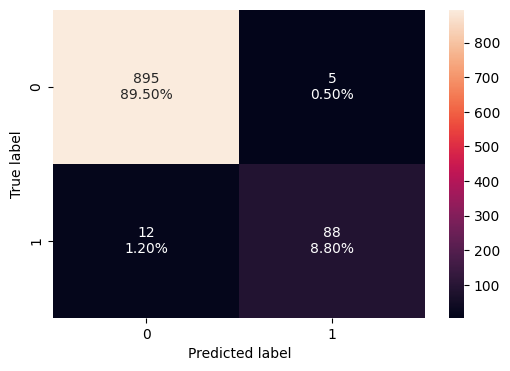

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)  # Confusion matrix on test data

In [ ]:
# Model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision        F1
0     0.983    0.88   0.946237  0.911917

###Cost-Complexity Pruning


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000205    0.000818
2     0.000214    0.001675
3     0.000237    0.002149
4     0.000245    0.002639
5     0.000309    0.004493
6     0.000310    0.005425
7     0.000315    0.006369
8     0.000333    0.006702
9     0.000384    0.008625
10    0.000400    0.009025
11    0.000427    0.009451
12    0.000438    0.009889
13    0.000458    0.010347
14    0.000517    0.010864
15    0.000578    0.012020
16    0.000613    0.012632
17    0.000668    0.015302
18    0.000764    0.019122
19    0.000905    0.020027
20    0.002784    0.025595
21    0.002889    0.028484
22    0.004283    0.032767
23    0.005692    0.038459
24    0.023713    0.062172
25    0.054889    0.171950

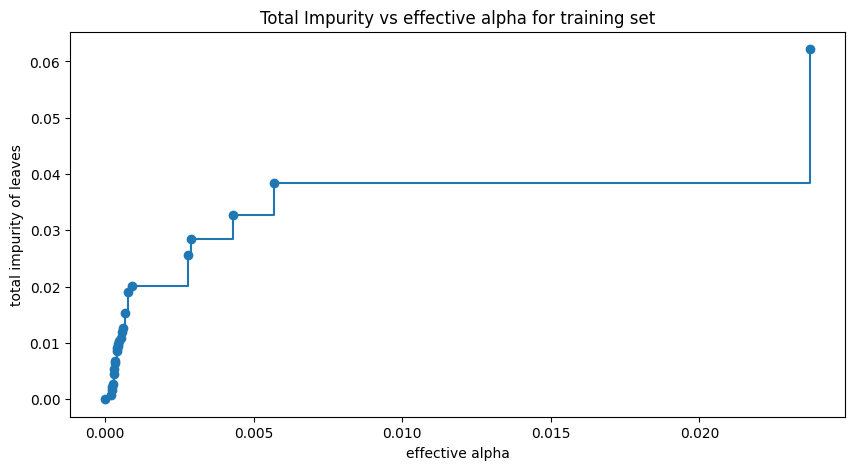

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train) ## Fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05488890137246505


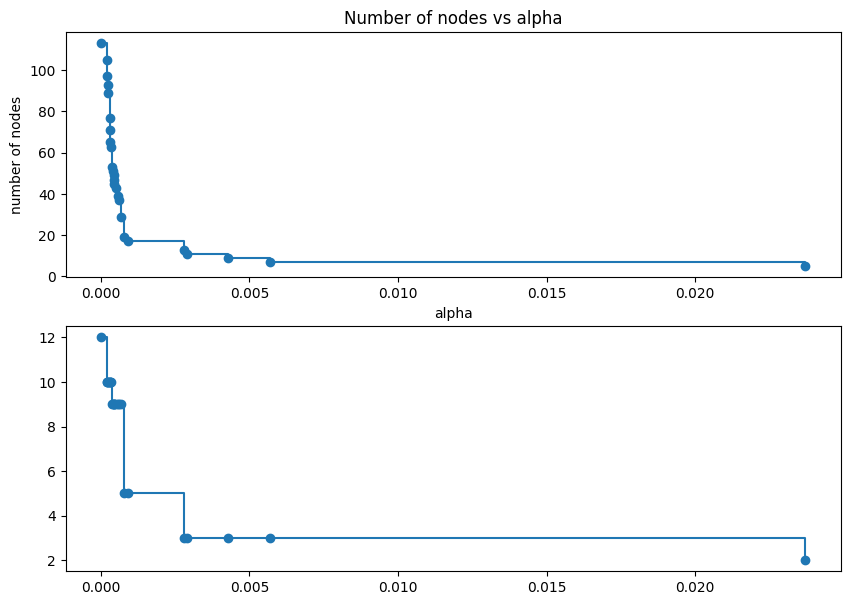

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

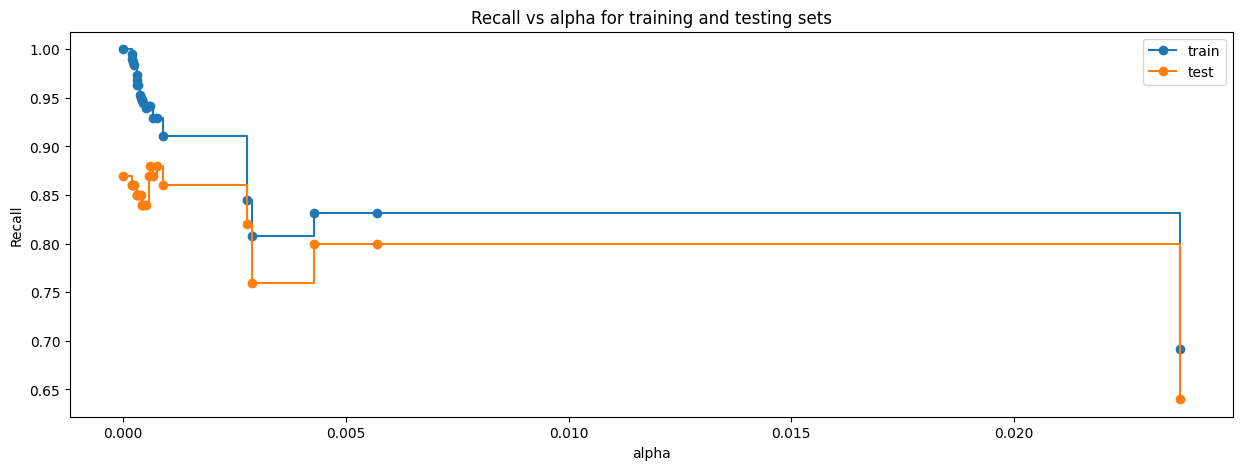

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006125000000000002, random_state=1)


**Post-Purning**


In [ ]:
# Identify the best alpha from cost-complexity pruning
best_alpha = ccp_alphas[index_best_model]

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006125000000000002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

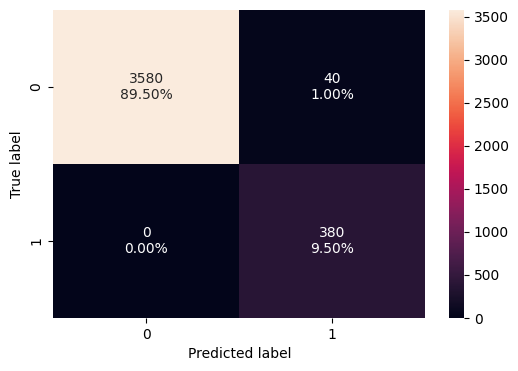

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

Accuracy  Recall  Precision    F1
0      0.99     1.0   0.904762  0.95

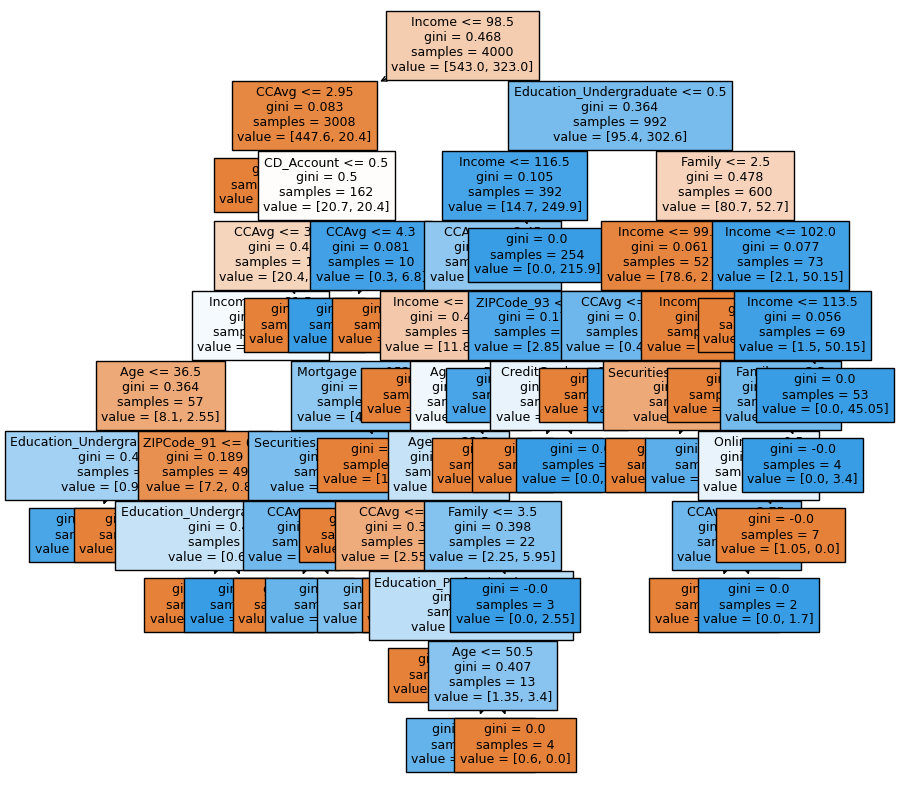

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [735]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [426.90, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.60, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |--- Income >  81.5

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.601865
Family                   0.142020
Education_Undergraduate  0.139664
CCAvg                    0.080708
Age                      0.009841
CD_Account               0.009256
Securities_Account       0.004395
Mortgage                 0.002769
Online                   0.002234
ZIPCode_91               0.002069
CreditCard               0.002018
Education_Professional   0.001964
ZIPCode_93               0.001197
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000


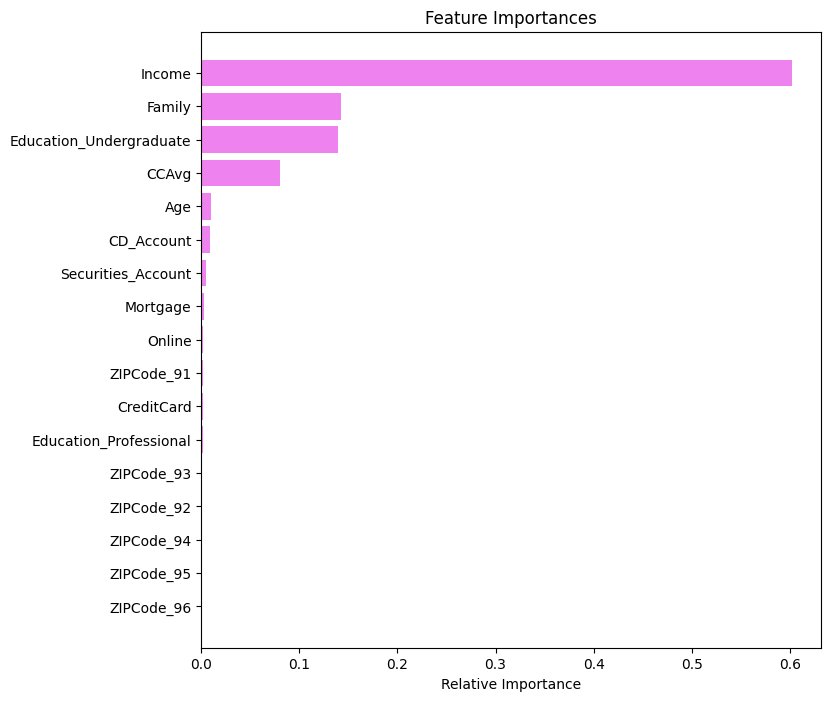

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

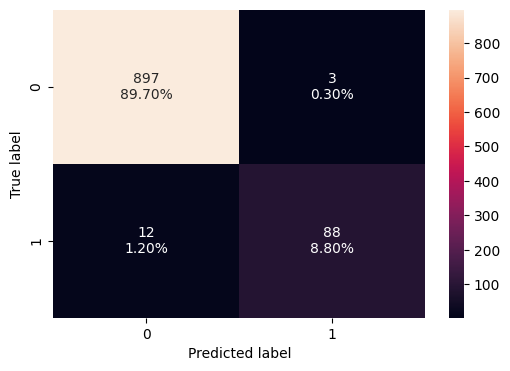

In [ ]:
confusion_matrix_sklearn(estimator_2,X_test,y_test)  # Complete the code to get the confusion matrix on test data

In [736]:
# Complete the code to get the model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2,X_test,y_test)
decision_tree_tune_post_test

Accuracy  Recall  Precision        F1
0     0.989    0.91   0.978495  0.943005

## Model Comparison and Final Model Selection

In [737]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.988750   
Recall                       1.0                     0.928947   
Precision                    1.0                     0.951482   
F1                           1.0                     0.940080   

           Decision Tree (Post-Pruning)  
Accuracy                       0.990000  
Recall                         1.000000  
Precision                      0.904762  
F1                             0.950000

In [738]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.982000                     0.983000   
Recall                  0.870000                     0.880000   
Precision               0.945652                     0.946237   
F1                      0.906250                     0.911917   

           Decision Tree (Post-Pruning)  
Accuracy                       0.989000  
Recall                         0.910000  
Precision                      0.978495  
F1                             0.943005

## Actionable Insights and Business Recommendations


**Business Recommendations:**

- The feature "Income" is the most important in the decision-making process, indicating that customers with more Income are more likely to accept personal loans.
- "Educations" and "Family" are also significant contributors to the decision tree model.
- Features such as "Securities_Account," "ZIPCode_93," "ZIPCode_96," and "CreditCard" seem to have minimal impact on the model.




**Target Marketing Efforts:**

- Focus marketing efforts on customers with undergraduate education, as they are more likely to accept personal loans.
Consider tailoring marketing strategies based on income and family size, as these features play a significant role.

**Review ZIP Codes:**

- Evaluate the impact of ZIP codes on customer decisions. Certain ZIP codes may have higher or lower acceptance rates for personal loans.
Monitor CD Account Holders:

- Customers with a Certificate of Deposit (CD) account are more likely to accept personal loans.

- Consider targeted promotions or incentives for CD account holders to increase

**loan acceptance.
Simplify Decision Process:**

- Implement a system for continuous monitoring of customer data and updating the model periodically to adapt to changing trends and behaviors.


___